<a href="https://colab.research.google.com/github/tanishajn12/NNDL-Labs/blob/main/NNDL_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize and flatten images
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


In [4]:
def build_model(regularizer):
    return keras.Sequential([
        keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer, input_shape=(784,)),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        keras.layers.Dense(10, activation='softmax')  # Output layer
    ])


In [5]:
# Models with L1 and L2 Regularization
lambda_val = 0.001
model_L1 = build_model(keras.regularizers.l1(lambda_val))
model_L2 = build_model(keras.regularizers.l2(lambda_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
def compile_and_train(model, name):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)
    return history

In [7]:
history_L1 = compile_and_train(model_L1, "L1")
history_L2 = compile_and_train(model_L2, "L2")


## NOTES
L1 Regularization results in sparser weights, making it useful when some features are irrelevant.

L2 Regularization generally performs better in deep networks, as it reduces overfitting without discarding features.

L2 is often preferred in deep learning, while L1 is useful for feature selection in sparse datasets.

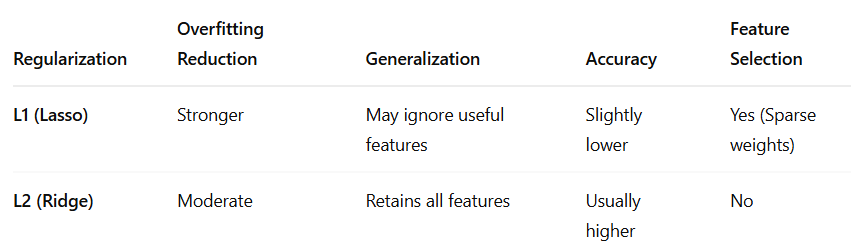

In [8]:
test_loss_L1, test_acc_L1 = model_L1.evaluate(x_test, y_test, verbose=0)
test_loss_L2, test_acc_L2 = model_L2.evaluate(x_test, y_test, verbose=0)

In [9]:
print(f"L1 Regularization Test Accuracy: {test_acc_L1:.4f}")
print(f"L2 Regularization Test Accuracy: {test_acc_L2:.4f}")


L1 Regularization Test Accuracy: 0.9537
L2 Regularization Test Accuracy: 0.9748


In [10]:
def plot_history(hist1, hist2, title, key):
    plt.plot(hist1.history[key], label="L1")
    plt.plot(hist2.history[key], label="L2")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.show()

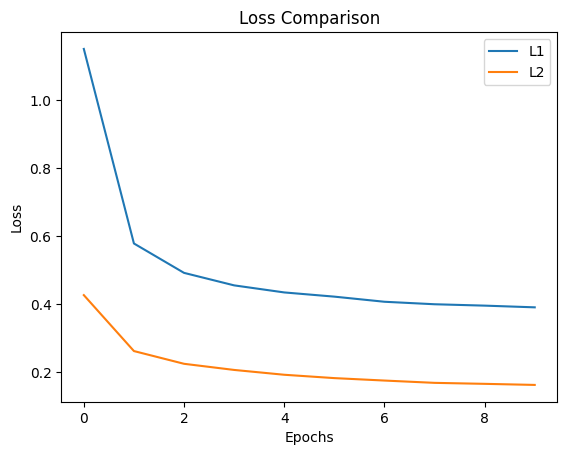

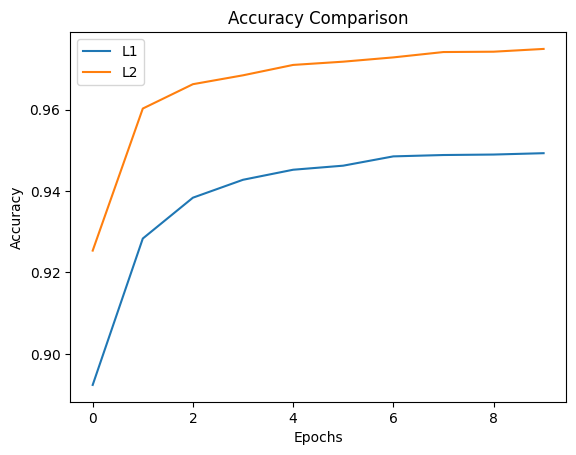

In [11]:
plot_history(history_L1, history_L2, "Loss Comparison", "loss")
plot_history(history_L1, history_L2, "Accuracy Comparison", "accuracy")

In [12]:
y_pred_L1 = np.argmax(model_L1.predict(x_test), axis=1)
y_pred_L2 = np.argmax(model_L2.predict(x_test), axis=1)

print("L1 Regularization - Classification Report:")
print(classification_report(y_test, y_pred_L1))

print("L2 Regularization - Classification Report:")
print(classification_report(y_test, y_pred_L2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
L1 Regularization - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.92      0.96      0.94      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.91      0.94       892
           6       0.94      0.97      0.95       958
           7       0.95      0.94      0.95      1028
           8       0.97      0.90      0.94       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

L2 Regularization - Classification Report:
              precision    recall  f1-score   support

           0      

In [13]:
def build_model(regularizer):
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer, input_shape=(784,)),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        keras.layers.Dense(10, activation='softmax')  # Output layer
    ])
    return model

In [14]:
lambda_val = 0.001

# Create models with L1 and L2 regularization
model_L1 = build_model(keras.regularizers.l1(lambda_val))
model_L2 = build_model(keras.regularizers.l2(lambda_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
def compile_and_train(model, name):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                        validation_data=(x_test, y_test), verbose=1)

    return history

# Train the models
history_L1 = compile_and_train(model_L1, "L1")
history_L2 = compile_and_train(model_L2, "L2")

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8435 - loss: 2.8350 - val_accuracy: 0.9237 - val_loss: 0.7392
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9198 - loss: 0.7036 - val_accuracy: 0.9366 - val_loss: 0.5682
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9329 - loss: 0.5693 - val_accuracy: 0.9428 - val_loss: 0.5151
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9393 - loss: 0.5191 - val_accuracy: 0.9443 - val_loss: 0.4770
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9410 - loss: 0.4897 - val_accuracy: 0.9441 - val_loss: 0.4707
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9423 - loss: 0.4698 - val_accuracy: 0.9474 - val_loss: 0.4424
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9441 - loss: 0.4543 - val_accuracy: 0.9509 - val_loss: 0.4331
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9442 - loss: 0.4457

## Note
Why Adam optimiser?

Combines momentum and adaptive learning rate for faster convergence

Why Sparse Categorical Crossentropy?

Since labels are integers (0-9), sparse_categorical_crossentropy is ideal. It avoids one-hot encoding and computes loss directly.

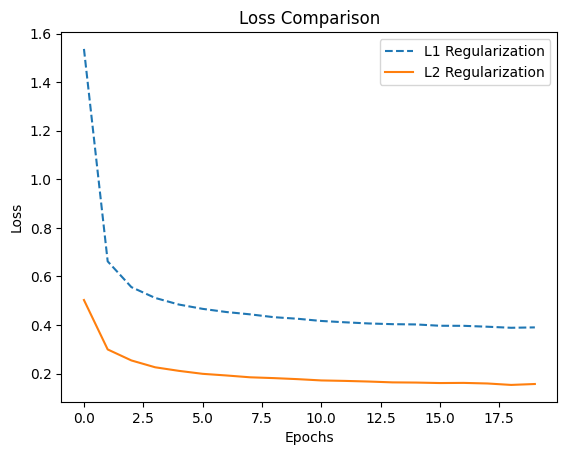

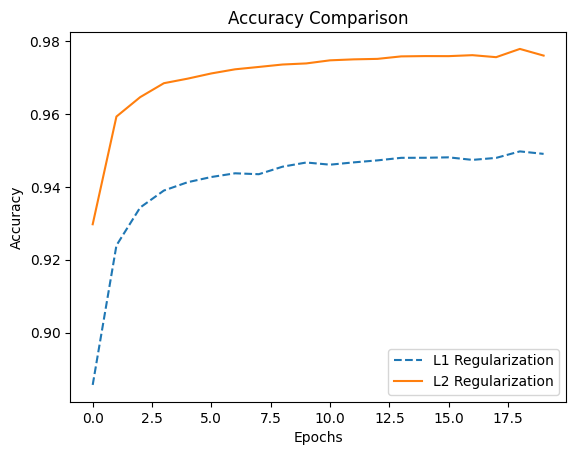

In [19]:
def plot_history(hist1, hist2, title, key):
    plt.plot(hist1.history[key], label="L1 Regularization", linestyle="--")
    plt.plot(hist2.history[key], label="L2 Regularization")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.show()

plot_history(history_L1, history_L2, "Loss Comparison", "loss")
plot_history(history_L1, history_L2, "Accuracy Comparison", "accuracy")


L1 Regularization will lead to higher initial loss but better generalization.

L2 Regularization will result in a smoother loss curve.



In [20]:
test_loss_L1, test_acc_L1 = model_L1.evaluate(x_test, y_test, verbose=0)
test_loss_L2, test_acc_L2 = model_L2.evaluate(x_test, y_test, verbose=0)

print(f"L1 Regularization Test Accuracy: {test_acc_L1:.4f}")
print(f"L2 Regularization Test Accuracy: {test_acc_L2:.4f}")

L1 Regularization Test Accuracy: 0.9512
L2 Regularization Test Accuracy: 0.9715


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


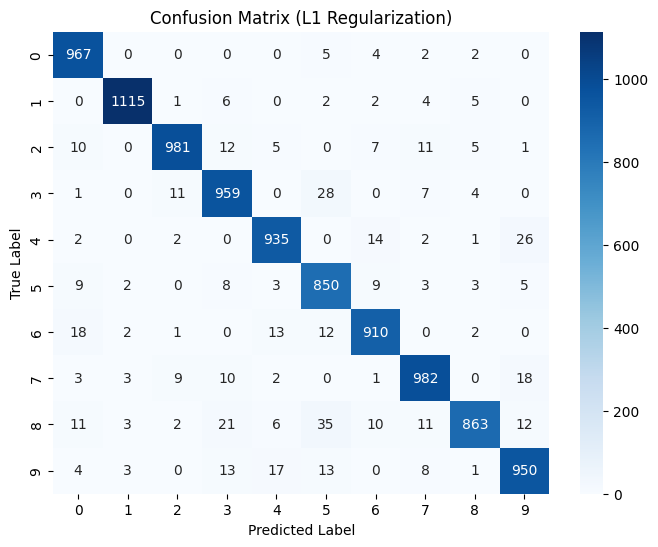

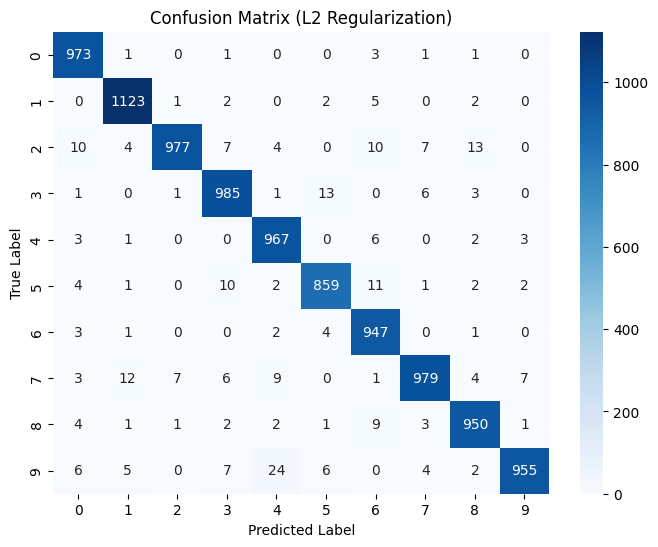

In [22]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict labels
y_pred_L1 = np.argmax(model_L1.predict(x_test), axis=1)
y_pred_L2 = np.argmax(model_L2.predict(x_test), axis=1)

# Confusion matrices
conf_matrix_L1 = confusion_matrix(y_test, y_pred_L1)
conf_matrix_L2 = confusion_matrix(y_test, y_pred_L2)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(conf_matrix_L1, "Confusion Matrix (L1 Regularization)")
plot_confusion_matrix(conf_matrix_L2, "Confusion Matrix (L2 Regularization)")


In [23]:
print("L1 Regularization - Classification Report:")
print(classification_report(y_test, y_pred_L1))

print("L2 Regularization - Classification Report:")
print(classification_report(y_test, y_pred_L2))

L1 Regularization - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.95      0.96      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.90      0.95      0.93       892
           6       0.95      0.95      0.95       958
           7       0.95      0.96      0.95      1028
           8       0.97      0.89      0.93       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

L2 Regularization - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98   